# YOLO-V6 chess piece detection
Learning Source [LINK](https://blog.roboflow.com/how-to-train-yolov6-on-a-custom-dataset/#train-a-custom-yolov6-model)

Paper Source [LINK](https://arxiv.org/abs/2209.02976)

Access on october 21, 2024

## Q3

In [13]:
!git clone https://github.com/meituan/YOLOv6

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3838, done.
remote: Total 3838 (delta 0), reused 0 (delta 0), pack-reused 3838 (from 1)
Receiving objects: 100% (3838/3838), 43.99 MiB | 37.69 MiB/s, done.
Resolving deltas: 100% (2297/2297), done.


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd /content/YOLOv6

/content/YOLOv6


In [16]:
!pip install -r requirements.txt

## Fine-tuning yolo model

In [17]:
import torch
torch.cuda.get_device_name(0)

'Tesla T4'

In [19]:
!python tools/train.py --batch 20 --conf configs/yolov6s_finetune.py --data-path /content/dataset.yaml --device 0 --epochs 100 --eval-interval 2


Streaming output truncated to the last 5000 lines.
/content/YOLOv6/yolov6/models/losses/loss.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
     65/99  0.0007453     0.335         0    0.6354:  42%|████▏     | 13/31 [00:12<00:16,  1.10it/s]/content/YOLOv6/yolov6/core/engine.py:150: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(enabled=self.device != 'cpu'):
/content/YOLOv6/yolov6/models/losses/loss.py:208: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
     65/99  0.0007453    0.3327         0    0.6354:  45%|████▌     | 14/31 [00:13<00:18,  1.06s/it]/content/YOLOv6/yolov6/core/engine.py:150: FutureWarning: `torch.cuda.amp.autocast(args...)`

## Testing the model

In [20]:
!python tools/infer.py --weights runs/train/exp2/weights/best_ckpt.pt --source /content/drive/MyDrive/YoloV6_Chess/images/test --yaml /content/dataset.yaml --device 0

Namespace(weights='runs/train/exp2/weights/best_ckpt.pt', source='/content/drive/MyDrive/YoloV6_Chess/images/test', webcam=False, webcam_addr='0', yaml='/content/dataset.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/exp2/weights/best_ckpt.pt
/content/YOLOv6/yolov6/utils/checkpoint.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the fu

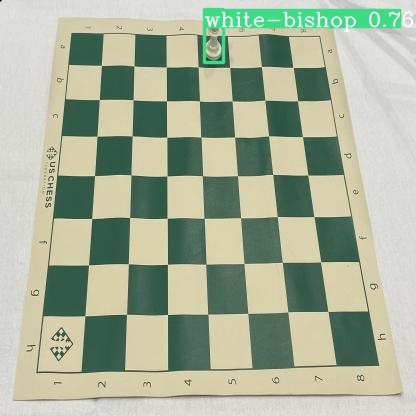

In [25]:
from IPython.display import Image #this is to render predictions
Image(filename='runs/inference/exp/test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg', width=1000)

In [26]:
!zip -r /content/YOLOv6.zip /content/YOLOv6

  adding: content/YOLOv6/ (stored 0%)
  adding: content/YOLOv6/runs/ (stored 0%)
  adding: content/YOLOv6/runs/train/ (stored 0%)
  adding: content/YOLOv6/runs/train/exp2/ (stored 0%)
  adding: content/YOLOv6/runs/train/exp2/weights/ (stored 0%)
  adding: content/YOLOv6/runs/train/exp2/weights/best_stop_aug_ckpt.pt (deflated 8%)
  adding: content/YOLOv6/runs/train/exp2/weights/last_ckpt.pt (deflated 8%)
  adding: content/YOLOv6/runs/train/exp2/weights/best_ckpt.pt (deflated 8%)
  adding: content/YOLOv6/runs/train/exp2/events.out.tfevents.1729675590.6975b3277afa.4803.0 (deflated 0%)
  adding: content/YOLOv6/runs/train/exp2/args.yaml (deflated 45%)
  adding: content/YOLOv6/runs/train/exp2/predictions.json (deflated 89%)
  adding: content/YOLOv6/runs/train/exp/ (stored 0%)
  adding: content/YOLOv6/runs/train/exp/args.yaml (deflated 45%)
  adding: content/YOLOv6/runs/train/exp1/ (stored 0%)
  adding: content/YOLOv6/runs/train/exp1/args.yaml (deflated 45%)
  adding: content/YOLOv6/runs/infe

In [30]:
from google.colab import files
files.download('/content/YOLOv6.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
!zip -r /content/test.zip /content/YOLOv6/runs/inference/exp/test

  adding: content/YOLOv6/runs/inference/exp/test/ (stored 0%)
  adding: content/YOLOv6/runs/inference/exp/test/IMG_0169_JPG.rf.1de291413bb78ef8ff0eaa8ffac38b06.jpg (deflated 1%)
  adding: content/YOLOv6/runs/inference/exp/test/e0d38d159ad3a801d0304d7e275812cc_jpg.rf.16aa43d37a5a2d2c32402cfa877d0a0d.jpg (deflated 5%)
  adding: content/YOLOv6/runs/inference/exp/test/b9402881fa580d0eb8b9b98845417550_jpg.rf.7c401587706c0c03dab27877a8d22f55.jpg (deflated 1%)
  adding: content/YOLOv6/runs/inference/exp/test/fdcd6ada676799da8a870f58fdf548db_jpg.rf.b0ea8552b6106bb4ab62ca8957fca40d.jpg (deflated 1%)
  adding: content/YOLOv6/runs/inference/exp/test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg (deflated 6%)
  adding: content/YOLOv6/runs/inference/exp/test/c5a012dfa72816098d23fc8baee67834_jpg.rf.6e0feae2ac0229ff5f20fc842852c81d.jpg (deflated 5%)
  adding: content/YOLOv6/runs/inference/exp/test/f1a24b6bb778ee11ba33687415aa84f2_jpg.rf.f2646d2d46b39f6510975f24d554bae1.

In [ ]:
files.download('/content/test.zip')